In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve

In [84]:
# load the dataset
df = pd.read_csv('/Users/kiki/Desktop/2023fall/1001/project 2/movieReplicationSet.csv')
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


## Data Preprocessing

In [85]:
# extract first 400 columns of movie rating
movie_rating = df.iloc[:, :400]
movie_rating.isnull().sum()

The Life of David Gale (2003)                1021
Wing Commander (1999)                        1026
Django Unchained (2012)                       644
Alien (1979)                                  808
Indiana Jones and the Last Crusade (1989)     634
                                             ... 
Patton (1970)                                1036
Anaconda (1997)                               899
Twister (1996)                                923
MacArthur (1977)                             1036
Look Who's Talking (1989)                     989
Length: 400, dtype: int64

In [86]:
movie_rating.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN


### Missing value imputation 

In [87]:
# perform the 50-50 blend missing value imputation

column_means = movie_rating.mean(axis = 0, skipna=True)
row_means = movie_rating.mean(axis = 1, skipna=True)
for i, col in enumerate(movie_rating.columns):
    movie_rating[col] = movie_rating[col].fillna(0.5 * (column_means[i] + row_means))


In [88]:
movie_rating.isnull().sum()

The Life of David Gale (2003)                1
Wing Commander (1999)                        1
Django Unchained (2012)                      1
Alien (1979)                                 1
Indiana Jones and the Last Crusade (1989)    1
                                            ..
Patton (1970)                                1
Anaconda (1997)                              1
Twister (1996)                               1
MacArthur (1977)                             1
Look Who's Talking (1989)                    1
Length: 400, dtype: int64

We found out that there are still missing values exist, we checked the dataset, and turned out it to be a viewer gives no rating for any of those movies (the entire row is empty).

In [89]:
# viewer 897 gives no review
movie_rating.iloc[896, :]

The Life of David Gale (2003)               NaN
Wing Commander (1999)                       NaN
Django Unchained (2012)                     NaN
Alien (1979)                                NaN
Indiana Jones and the Last Crusade (1989)   NaN
                                             ..
Patton (1970)                               NaN
Anaconda (1997)                             NaN
Twister (1996)                              NaN
MacArthur (1977)                            NaN
Look Who's Talking (1989)                   NaN
Name: 896, Length: 400, dtype: float64

In [90]:
# missing value imputation for viewer 897
# we do not have to multiple 0.5 to calculate the rating because we are only using the column_means
for col in pd.DataFrame(movie_rating.iloc[896,:]).T.columns:
    movie_rating.iloc[896,:][col] = column_means[col]

movie_rating.iloc[896, :]
    
    

The Life of David Gale (2003)                2.151316
Wing Commander (1999)                        2.021127
Django Unchained (2012)                      3.153422
Alien (1979)                                 2.707612
Indiana Jones and the Last Crusade (1989)    2.778618
                                               ...   
Patton (1970)                                2.278689
Anaconda (1997)                              2.295455
Twister (1996)                               2.402299
MacArthur (1977)                             2.114754
Look Who's Talking (1989)                    2.337963
Name: 896, Length: 400, dtype: float64

In [91]:
# make sure that there is no missing value now
movie_rating.isnull().sum()

The Life of David Gale (2003)                0
Wing Commander (1999)                        0
Django Unchained (2012)                      0
Alien (1979)                                 0
Indiana Jones and the Last Crusade (1989)    0
                                            ..
Patton (1970)                                0
Anaconda (1997)                              0
Twister (1996)                               0
MacArthur (1977)                             0
Look Who's Talking (1989)                    0
Length: 400, dtype: int64

### Question 1

In [92]:
# create a new dataframe to store information for each movie
best_candi = pd.DataFrame(columns = ['Movie', 'Best Predictor', 'COD'])

# two loops to iterate over movies
for movie in movie_rating.columns:
    target_rating = movie_rating[movie]

    # initialize variables for each movie before starting looping
    best_cod = -1
    best_predictor = None

    for other_movie in movie_rating.columns:
        if other_movie != movie:
            predict_rating = movie_rating[other_movie]
            
            X = predict_rating.values.reshape(-1,1)
            y = target_rating.loc[predict_rating.index]
            
            model = LinearRegression()
            model.fit(X, y)
            y_predict = model.predict(X)

            r2 = r2_score(y, y_predict)

            # compare to the current best cod and update it if outperformed
            if r2 > best_cod:
                best_cod = r2
                best_predictor = other_movie
    
    best_candi = best_candi.append({'Movie': movie, 'Best Predictor': best_predictor, 'COD':best_cod}, ignore_index = True)

In [93]:
best_candi

,Movie,Best Predictor,COD
0,The Life of David Gale (2003),The King of Marvin Gardens (1972),0.567937
1,Wing Commander (1999),From Hell (2001),0.561052
2,Django Unchained (2012),The Life of David Gale (2003),0.232041
3,Alien (1979),Aliens (1986),0.329566
4,Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),0.374484
...,...,...,...
395,Patton (1970),The Lookout (2007),0.713793
396,Anaconda (1997),The Lookout (2007),0.347016
397,Twister (1996),Sexy Beast (2000),0.419015
398,MacArthur (1977),Miller's Crossing (1990),0.624702


In [94]:
# average value for COD
print(best_candi['COD'].mean())

0.4237994048248019


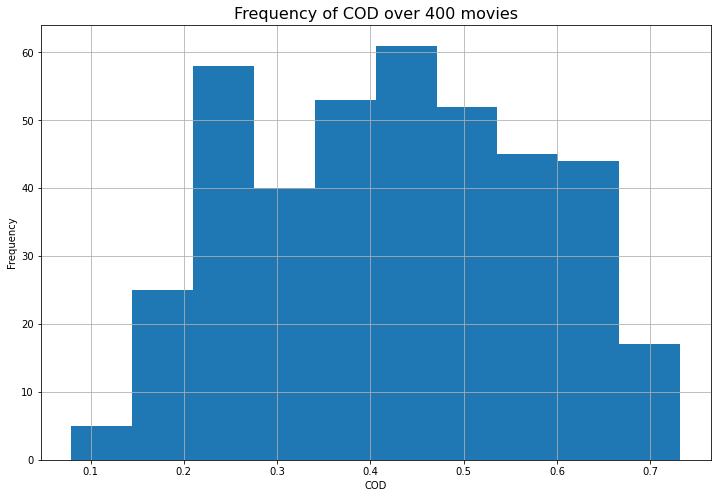

In [95]:
# histogram for COD of 400 movies

plt.figure(figsize=(12, 8))
plt.hist(best_candi['COD'])
plt.xlabel('COD')
plt.ylabel('Frequency')
plt.title('Frequency of COD over 400 movies', fontsize = 16)
plt.grid()


In [96]:
# higher R^2 makes the prediction easier

easiest_predict = best_candi.sort_values('COD', ascending = False).head(10)
easiest_predict

,Movie,Best Predictor,COD
203,Erik the Viking (1989),I.Q. (1994),0.731789
208,I.Q. (1994),Erik the Viking (1989),0.731789
377,The Lookout (2007),Patton (1970),0.713793
395,Patton (1970),The Lookout (2007),0.713793
240,The Bandit (1996),Best Laid Plans (1999),0.711540
249,Best Laid Plans (1999),The Bandit (1996),0.711540
282,Congo (1995),The Straight Story (1999),0.700822
287,The Straight Story (1999),Congo (1995),0.700822
334,The Final Conflict (1981),The Lookout (2007),0.700437
300,Ran (1985),Heavy Traffic (1973),0.692863


In [97]:
hardest_predict = best_candi.sort_values('COD').head(10)
hardest_predict

,Movie,Best Predictor,COD
80,Avatar (2009),Bad Boys (1995),0.079484
95,Interstellar (2014),Torque (2004),0.111184
9,Black Swan (2010),Sorority Boys (2002),0.116970
55,Clueless (1995),Escape from LA (1996),0.141324
190,The Cabin in the Woods (2012),The Evil Dead (1981),0.143925
319,La La Land (2016),The Lookout (2007),0.148358
292,Titanic (1997),Cocktail (1988),0.153920
41,13 Going on 30 (2004),Can't Hardly Wait (1998),0.160118
14,The Fast and the Furious (2001),Terminator 3: Rise of the Machines (2003),0.169000
248,Grown Ups 2 (2013),The Core (2003),0.171151


### Question 2

In [98]:
additional_feature = df.iloc[:, 474:477]
additional_feature.isnull().sum()

Gender identity (1 = female; 2 = male; 3 = self-described)            24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)            0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)     0
dtype: int64

In [99]:
additional_feature['Gender identity (1 = female; 2 = male; 3 = self-described)'].mode().iloc[0]

1.0

In [100]:
# fill the null value with the mode
additional_feature['Gender identity (1 = female; 2 = male; 3 = self-described)'] = additional_feature['Gender identity (1 = female; 2 = male; 3 = self-described)'].fillna(additional_feature['Gender identity (1 = female; 2 = male; 3 = self-described)'].mode().iloc[0])
additional_feature.isnull().sum()

Gender identity (1 = female; 2 = male; 3 = self-described)            0
Are you an only child? (1: Yes; 0: No; -1: Did not respond)           0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)    0
dtype: int64

In [101]:
combo = pd.concat([easiest_predict, hardest_predict])
combo

,Movie,Best Predictor,COD
203,Erik the Viking (1989),I.Q. (1994),0.731789
208,I.Q. (1994),Erik the Viking (1989),0.731789
377,The Lookout (2007),Patton (1970),0.713793
395,Patton (1970),The Lookout (2007),0.713793
240,The Bandit (1996),Best Laid Plans (1999),0.711540
249,Best Laid Plans (1999),The Bandit (1996),0.711540
282,Congo (1995),The Straight Story (1999),0.700822
287,The Straight Story (1999),Congo (1995),0.700822
334,The Final Conflict (1981),The Lookout (2007),0.700437
300,Ran (1985),Heavy Traffic (1973),0.692863


In [102]:
# initialize a new list to store the new COD
new_cod = []

for i in range(len(combo)):
    movie = combo.iloc[i, 0]
    predictor = combo.iloc[i, 1]

    additional_feature['predictor'] = movie_rating[predictor]

    X = additional_feature
    y = movie_rating[movie]

    model = LinearRegression()
    model.fit(X, y)

    y_predict = model.predict(X)

    r2 = r2_score(y, y_predict)
    new_cod.append(r2)

combo['new COD'] = new_cod
combo


,Movie,Best Predictor,COD,new COD
203,Erik the Viking (1989),I.Q. (1994),0.731789,0.732844
208,I.Q. (1994),Erik the Viking (1989),0.731789,0.732207
377,The Lookout (2007),Patton (1970),0.713793,0.715100
395,Patton (1970),The Lookout (2007),0.713793,0.714886
240,The Bandit (1996),Best Laid Plans (1999),0.711540,0.712690
249,Best Laid Plans (1999),The Bandit (1996),0.711540,0.712747
282,Congo (1995),The Straight Story (1999),0.700822,0.700903
287,The Straight Story (1999),Congo (1995),0.700822,0.701535
334,The Final Conflict (1981),The Lookout (2007),0.700437,0.702211
300,Ran (1985),Heavy Traffic (1973),0.692863,0.693300


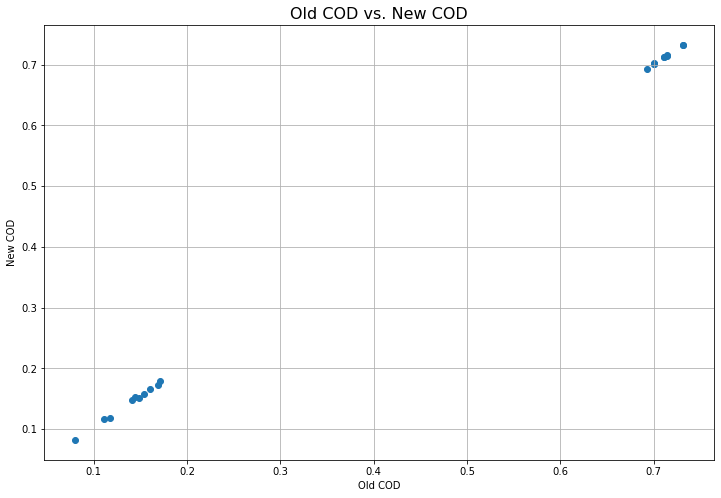

In [103]:
plt.figure(figsize=(12, 8))
plt.scatter(combo['COD'], combo['new COD'])
plt.xlabel('Old COD')
plt.ylabel('New COD')
plt.title('Old COD vs. New COD', fontsize = 16)
plt.grid()

We can tell from both the table and the scatteplot that there seems to have no discernible changes between old COD and new COD.

#

### Question 3

In [104]:
# pick 30 movies in the middle of the COD range and retrieve their ratings
middle = best_candi.sort_values('COD', ascending = False)[190:220]
df_middle = movie_rating[middle['Movie']]

In [105]:
# pick 10 movies as input and retrieve their ratings
input = best_candi.sort_values('COD', ascending = False)[130:140]
df_input = movie_rating[input['Movie']]
X = df_input

In [106]:
# initialize standard scaler
scaler = StandardScaler()

# create dataframes to store information
best_combo_ridge = pd.DataFrame(columns = ['Movie', 'Best alpha', 'Beta', 'Best Score'])
best_model_ridge = pd.DataFrame(columns = ['Movie', 'RMSE'])

for movie in df_middle.columns:
    y = df_middle[movie]
    X = X

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    # standardize features before training
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # define Ridge
    ridge = Ridge()
    
    # define hyperparameters
    param_grid = {'alpha':[0.001, 0.01, 0.1,1,5,10,50,100, 200, 500]}
    grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv = 5)
    grid_search.fit(X_train_scaled, y_train)

    # using the best alpha fit ridge regression
    best_alpha = grid_search.best_params_['alpha']

    best_ridge = Ridge(alpha=best_alpha)
    best_ridge.fit(X_train_scaled, y_train)

    y_pred = best_ridge.predict(X_test_scaled)

    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # update the dataframe
    best_model_ridge = best_model_ridge.append({'Movie': movie, 'RMSE': rmse}, ignore_index=True)
    best_combo_ridge = best_combo_ridge.append({'Movie': movie, 'Best alpha': grid_search.best_params_, 'Beta': best_ridge.coef_, 'Best Score': grid_search.best_score_}, ignore_index=True)
    
    

In [107]:
# display the movie and corresponding RMSE using the best alpha
best_model_ridge

,Movie,RMSE
0,The Mummy Returns (2001),0.570577
1,Equilibrium (2002),0.343817
2,Let the Right One In (2008),0.233734
3,The Good the Bad and the Ugly (1966),0.400870
4,The Poseidon Adventure (1972),0.314139
5,You're Next (2011),0.235375
6,The Rock (1996),0.390641
7,The Green Mile (1999),0.329143
8,Men in Black II (2002),0.539028
9,Men in Black (1997),0.556961


In [108]:
# display the movie with corresponding best alpha and beta holding the best R^2 score
best_combo_ridge

,Movie,Best alpha,Beta,Best Score
0,The Mummy Returns (2001),{'alpha': 500},"[0.06522793093430042, 0.04744452447087967, 0.0...",-0.218036
1,Equilibrium (2002),{'alpha': 200},"[0.009505520078764828, 0.049433301268302116, 0...",-0.084463
2,Let the Right One In (2008),{'alpha': 500},"[0.04587480421007934, 0.027871821194181665, 0....",-0.106293
3,The Good the Bad and the Ugly (1966),{'alpha': 500},"[0.04357251835345534, 0.01993507601018119, 0.0...",-0.128233
4,The Poseidon Adventure (1972),{'alpha': 500},"[0.032061091627159886, 0.039385730317742305, 0...",-0.115613
5,You're Next (2011),{'alpha': 200},"[-0.0012019396505597675, 0.03439220699129316, ...",-0.127836
6,The Rock (1996),{'alpha': 100},"[0.023630956866799648, 0.015821035239216588, 0...",-0.094468
7,The Green Mile (1999),{'alpha': 100},"[-0.032153043168243696, 0.06740705205087695, 0...",-0.113370
8,Men in Black II (2002),{'alpha': 500},"[0.060960470914076414, 0.05673062539561032, 0....",-0.264657
9,Men in Black (1997),{'alpha': 500},"[0.058379640617440706, 0.04496281629171774, 0....",-0.268984


### Question 4

In [109]:
# pick 10 movies as input and retrieve their ratings
input = best_candi.sort_values('COD', ascending = False)[130:140]
df_input = movie_rating[input['Movie']]
X = df_input

In [110]:
# create dataframes to store information
best_combo_lasso = pd.DataFrame(columns = ['Movie', 'Best alpha', 'Beta', 'Best Score'])
best_model_lasso = pd.DataFrame(columns = ['Movie', 'RMSE'])

for movie in df_middle.columns:
    y = df_middle[movie]
    X = X

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    # standardize features before training
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # define Lasso
    lasso = Lasso()

    # define hyperparameters
    param_grid = {'alpha':[0.001, 0.01, 0.1,1,5,10,50,100, 200, 500]}
    grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv = 5)
    grid_search.fit(X_train_scaled, y_train)

    # using the best alpha fit ridge regression
    best_alpha = grid_search.best_params_['alpha']

    best_lasso = Lasso(alpha=best_alpha)
    best_lasso.fit(X_train_scaled, y_train)

    y_pred = best_lasso.predict(X_test_scaled)

    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # update the dataframe
    best_model_lasso = best_model_lasso.append({'Movie': movie, 'RMSE': rmse}, ignore_index=True)
    best_combo_lasso = best_combo_lasso.append({'Movie': movie, 'Best alpha': grid_search.best_params_, 'Beta': best_ridge.coef_, 'Best Score': grid_search.best_score_}, ignore_index=True)
    
    


In [111]:
# display the movie and corresponding RMSE using the best alpha
best_model_lasso

,Movie,RMSE
0,The Mummy Returns (2001),0.574116
1,Equilibrium (2002),0.343438
2,Let the Right One In (2008),0.232966
3,The Good the Bad and the Ugly (1966),0.407148
4,The Poseidon Adventure (1972),0.306696
5,You're Next (2011),0.234613
6,The Rock (1996),0.387246
7,The Green Mile (1999),0.331562
8,Men in Black II (2002),0.542475
9,Men in Black (1997),0.561786


In [112]:
# display the movie with corresponding best alpha and beta holding the best R^2 score
best_combo_lasso

,Movie,Best alpha,Beta,Best Score
0,The Mummy Returns (2001),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.226416
1,Equilibrium (2002),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.086603
2,Let the Right One In (2008),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.116144
3,The Good the Bad and the Ugly (1966),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.133061
4,The Poseidon Adventure (1972),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.123702
5,You're Next (2011),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.129565
6,The Rock (1996),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.094520
7,The Green Mile (1999),{'alpha': 0.001},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.114488
8,Men in Black II (2002),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.272500
9,Men in Black (1997),{'alpha': 0.01},"[0.04731372279296521, 0.098287240669613, 0.010...",-0.273758


### Question 5

In [113]:
no_impute_movie_rating = df.iloc[:, :400]

In [114]:
# average movie enjoyment for each user
rating_by_user = no_impute_movie_rating.mean(axis = 1, skipna=True)
df_X = pd.DataFrame(rating_by_user)


df_X = df_X.fillna(0)



In [115]:
rating_by_movie = no_impute_movie_rating.mean(axis = 0, skipna=True)
sort_rating_by_movie = rating_by_movie.sort_values()

In [116]:
target_movie = sort_rating_by_movie[250:254]

# derive the movie_name
movie_name = list(target_movie.keys())
movie_name

['Gangs of New York (2002)',
 'Lost in Translation (2003)',
 'Being John Malkovich (1999)',
 'Hannibal (2001)']

In [117]:
# assigne 1 or 0 
for movie in movie_name:
    movie_rating[f'{movie}_Enjoyment'] = (movie_rating[movie] > movie_rating[movie].median()).astype(int)

# creating new dataframe to just store these four movies and change column names for later fetching them in for loop
enjoyment = movie_rating.iloc[:, -4:]
enjoyment.columns = movie_name
enjoyment

,Gangs of New York (2002),Lost in Translation (2003),Being John Malkovich (1999),Hannibal (2001)
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1092,1,1,1,1
1093,0,1,1,1
1094,1,1,1,1
1095,1,1,1,1


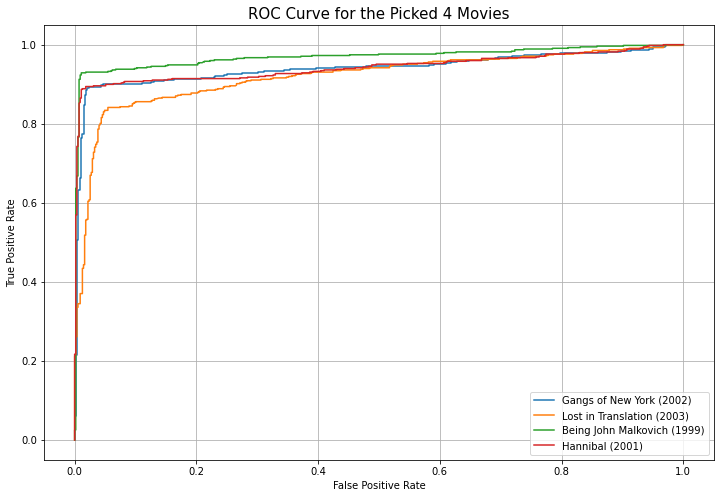

In [118]:
# create a dataframe to store results
outcomes = pd.DataFrame(columns=['Movie', 'Beta', 'AUC'])

# create k-fold 
kfold = KFold(n_splits=10)


plt.figure(figsize=(12,8))

for movie in enjoyment.columns:
    X = df_X.values.reshape(-1,1)
    y = enjoyment[movie].loc[df_X.index]
    
    
    # define logistic regression
    logistic = LogisticRegression()
    logistic.fit(X, y)

    y_pred = cross_val_predict(logistic, X, y, cv = kfold, method='predict_proba')[:, 1]

    auc = roc_auc_score(y, y_pred)

    outcomes = outcomes.append({'Movie': movie, 'Beta': logistic.coef_[0], 'AUC': auc}, ignore_index=True)

    fp, tp, _ = roc_curve(y, y_pred)
    plt.plot(fp, tp, label = f'{movie}')
    

plt.title('ROC Curve for the Picked 4 Movies', fontsize = 15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


  

In [119]:
outcomes

,Movie,Beta,AUC
0,Gangs of New York (2002),[6.004535839264226],0.940622
1,Lost in Translation (2003),[5.2656908585675835],0.919090
2,Being John Malkovich (1999),[8.08410742491061],0.969252
3,Hannibal (2001),[6.178894227831277],0.942385
